Text(0.5,1,'P135')

<Figure size 432x288 with 0 Axes>

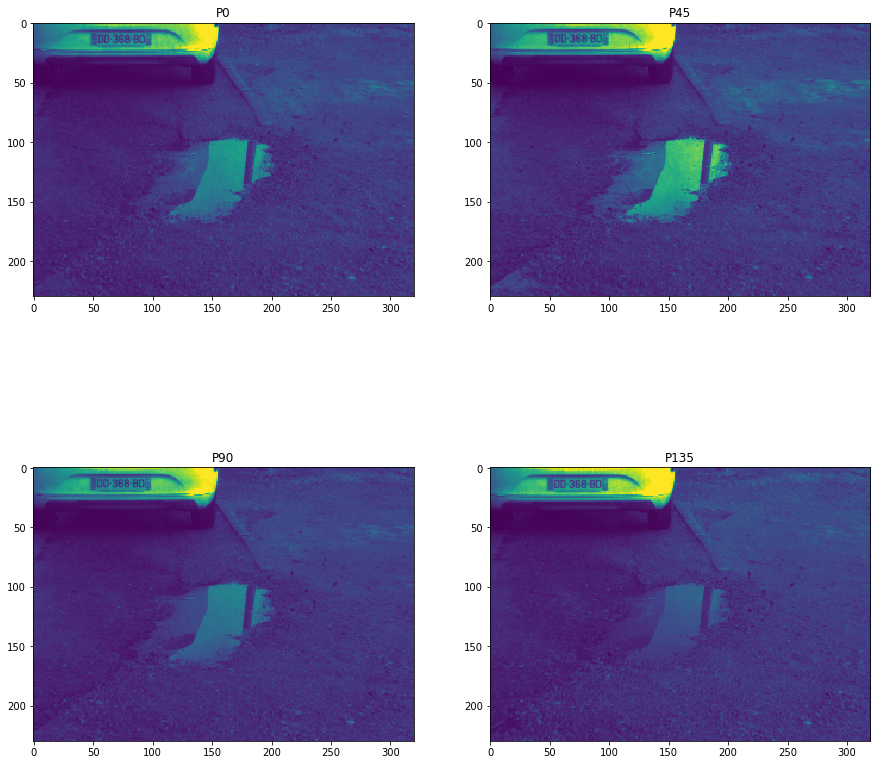

In [2]:
# Extraction des 4 images 

# Image composée de superpixels et chaque super pixel est composé de la façon suivante :
#  0 | 135
# --------
# 45 | 90

# On va donc retrouver P0, P45, P90, P135

import numpy as np
import imageio
import os
import pylab as pl

path = "/home/rblin/Documents/Archive/images/PolaBot-Dataset/PolarCam/image_00001.png"

image = imageio.imread(path)

P0 = np.zeros((int(image.shape[0]/2), int(image.shape[1]/2)))
P45 = np.zeros((int(image.shape[0]/2), int(image.shape[1]/2)))
P90 = np.zeros((int(image.shape[0]/2), int(image.shape[1]/2)))
P135 = np.zeros((int(image.shape[0]/2), int(image.shape[1]/2)))

super_pixel = np.zeros((2,2))
for i in range(0,image.shape[0],2):
    for j in range(0,image.shape[1],2):
        super_pixel = image[i:i+2,j:j+2]
        P0[int(i/2), int(j/2)] = super_pixel[0,0]
        P45[int(i/2), int(j/2)] = super_pixel[1,0]
        P90[int(i/2), int(j/2)] = super_pixel[1,1]
        P135[int(i/2), int(j/2)] = super_pixel[0,1]
        
# Affichage des images 

pl.figure(1)
pl.figure(figsize=(15,15))
pl.clf()
pl.subplot(2,2,1)
pl.imshow(P0)
pl.title("P0")
pl.subplot(2,2,2)
pl.imshow(P45)
pl.title("P45")
pl.subplot(2,2,3)
pl.imshow(P90)
pl.title("P90")
pl.subplot(2,2,4)
pl.imshow(P135)
pl.title("P135")

Text(0.5,1,'S3')

<Figure size 432x288 with 0 Axes>

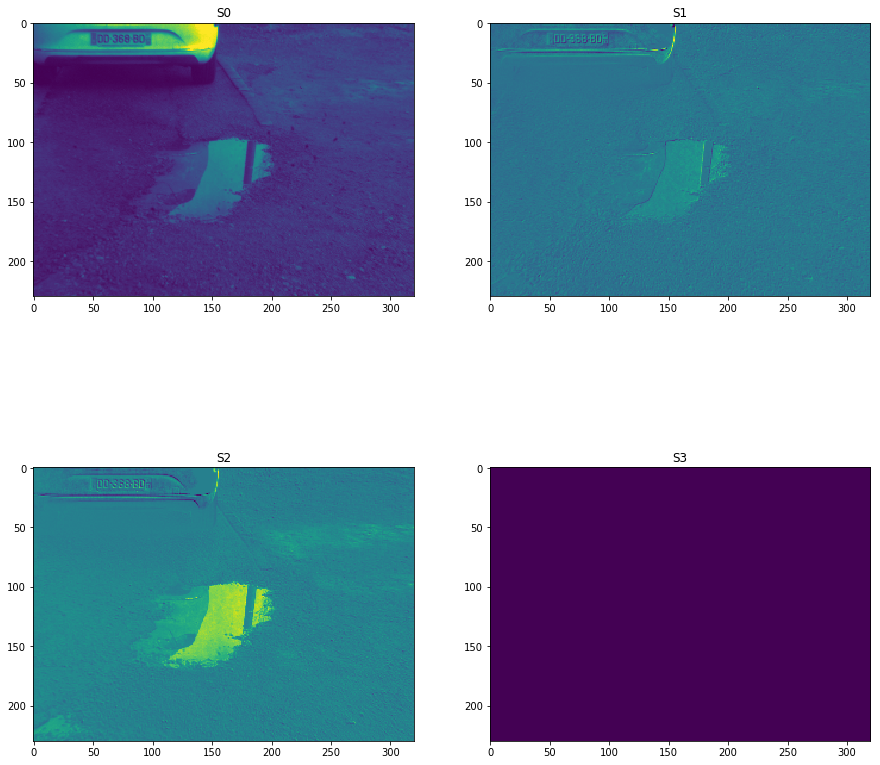

In [3]:
# Calcul des parametres de Stokes 

Stokes = np.zeros((4,P0.shape[0],P0.shape[1]))

Stokes[0] = P0 + P90
Stokes[1] = P0 - P90
Stokes[2] = P45 - P135
Stokes[3] = 0

# Affichage des paramètres de Stockes

pl.figure(2)
pl.figure(figsize=(15,15))
pl.clf()
pl.subplot(2,2,1)
pl.imshow(Stokes[0])
pl.title("S0")
pl.subplot(2,2,2)
pl.imshow(Stokes[1])
pl.title("S1")
pl.subplot(2,2,3)
pl.imshow(Stokes[2])
pl.title("S2")
pl.subplot(2,2,4)
pl.imshow(Stokes[3])
pl.title("S3")

Text(0.5,1,'DOP')

<Figure size 432x288 with 0 Axes>

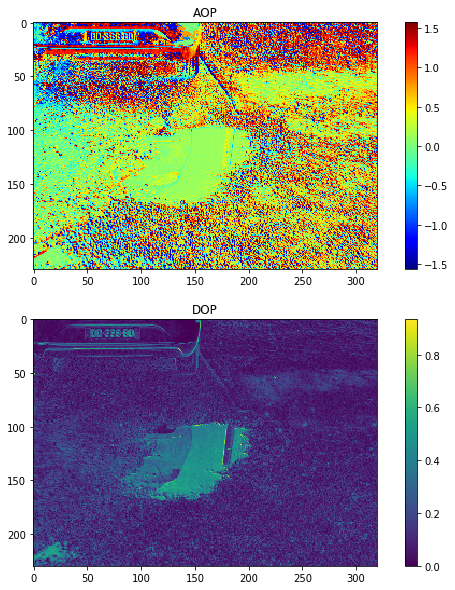

In [9]:
# Calcul de l'AOP et du DOP

AOP = 0.5*np.arctan2(Stokes[1], Stokes[2])

DOP = np.sqrt(Stokes[2]**2+Stokes[1]**2)/Stokes[0]

# Affichage des paramètres de polarisation

pl.figure(3)
pl.figure(figsize=(10,10))
pl.clf()
pl.subplot(2,1,1)
pl.imshow(AOP, cmap="jet")
pl.colorbar()
pl.title("AOP")
pl.subplot(2,1,2)
pl.imshow(DOP)
pl.colorbar()
pl.title("DOP")